In [127]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate


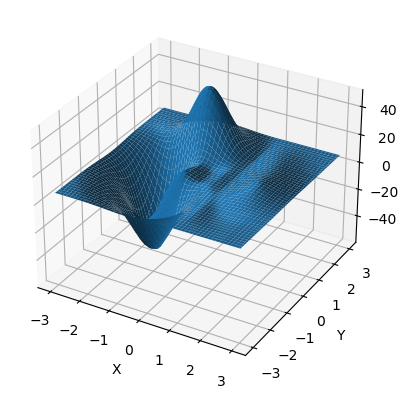

In [128]:
import numpy as np

def z_function(x, y):
    return 3*(1-x)**2*(np.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*(np.exp(-x**2 - y**2)) - 1/3*(np.exp(-(x+1)**2-y**2)))+7
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la gama de valores de x e y
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)

# Crear una cuadrícula 2D de valores x e y
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Calcular los valores de z para cada punto de la cuadrícula
z_grid = z_function(x_grid, y_grid)
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
ax.plot_surface(x_grid, y_grid, z_grid)

# Configurar las etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la figura
plt.show()


In [129]:
class GA():
    def __init__(self,c_length, p_size, p_crossover,p_mutation,max_generations):
        self.chromosome_length=c_length
        self.population_size=p_size
        self.prob_crossover=p_crossover
        self.prob_mutation=p_mutation
        self.max_generations=max_generations
        self.individuals=[]

    def decode(self,chromosome):

        binary_str=''.join([str(elem) for elem in chromosome])

        x1=((3+3)/((2**8)-1))*(int(binary_str[0:8],2))-3
        x2=((3+3)/((2**8)-1))*int(binary_str[8:],2)-3
        return x1,x2

    def fitness(self,chromosome):
        x,y=self.decode(chromosome)

        z = 3 * (1 - x) ** 2 * (math.exp(-x ** 2 - (y + 1) ** 2)) - 10 * (x / 5 - x ** 3 - y ** 5) * (math.exp(-x ** 2 - y ** 2)) - 1 / 3 * (math.exp(-(x + 1) ** 2 - y ** 2))
        return z 

    def init_population(self):
        for i in range(self.population_size):
            chromosome = [np.random.randint(0, 2) for each in range(self.chromosome_length)]
            self.individuals.append(chromosome)

    def normalized_and_accumulated_fitness(self):
        fitness_ = [self.fitness(chromosome) for chromosome in self.individuals]
        total_fitness = sum(fitness_)
        normalized_fitness = [f / total_fitness for f in fitness_]
        accumulated_fitness = list(accumulate(normalized_fitness))
        return fitness_, normalized_fitness, accumulated_fitness

    def roulette_wheel(self):
        fitness_, normalized_fitness, accumulated_fitness = self.normalized_and_accumulated_fitness()
        selected_individuals = [None, None]
        for i in range(2):
            eta = np.random.uniform(0, accumulated_fitness[-1])
            j = 0
            while eta > accumulated_fitness[j]:
                j += 1
            selected_individuals[i] = self.individuals[j]
        return selected_individuals

    def crossover(self):
        next_gen = []
        while len(next_gen) < self.population_size:
            l1, l2 = self.roulette_wheel()

            if np.random.rand() < self.prob_crossover:
                c = np.random.randint(1, self.chromosome_length-1)
                new_l1 = l1[:c] + l2[c:]
                new_l2 = l2[:c] + l1[c:]

                next_gen.extend([new_l1, new_l2])

        return next_gen


    def mutation(self, individuals):
        for individual in individuals:
            for j in range(self.chromosome_length):
                if np.random.rand() < self.prob_mutation:
                    individual[j] = 1 - individual[j]
        return individuals
    
    def perform_selection(self):
        mins, maxs, means, best_chromosomes = [], [], [], []
        self.init_population()

        for i in range(self.max_generations):
            fitness_, normalized_fitness, accumulated_fitness = self.normalized_and_accumulated_fitness()
            best_idx = np.argmax(fitness_)
            best_chromosome = self.individuals[best_idx]
            best_fitness = fitness_[best_idx]

            mins.append(np.min(fitness_))
            maxs.append(np.max(fitness_))
            means.append(np.mean(fitness_))
            best_chromosomes.append(best_chromosome)

            print("Generation:", i, "| Fitness:", best_fitness)

            next_gen = self.crossover()
            next_gen = self.mutation(next_gen)
            self.individuals = next_gen

        fitness_, normalized_fitness, accumulated_fitness = self.normalized_and_accumulated_fitness()
        best_idx = np.argmax(fitness_)
        best_chromosome = self.individuals[best_idx]
        best_fitness = fitness_[best_idx]

        mins.append(np.min(fitness_))
        maxs.append(np.max(fitness_))
        means.append(np.mean(fitness_))
        best_chromosomes.append(best_chromosome)

        print("Generation:", self.max_generations, "| Fitness:", best_fitness)

        return mins, maxs, means, best_chromosomes
    

The time complexity of the init_population method is O(population_size * chromosome_length), as it iterates over the population size and generates a chromosome of length chromosome_length for each individual.

The time complexity of the decode method is O(1) as it performs a fixed number of operations regardless of the size of the chromosome.

The time complexity of the fitness method depends on the complexity of the fitness function. In this case, the fitness function involves several mathematical operations, including exponentials, multiplications, and additions. Assuming that these operations are constant-time, the time complexity of the fitness method is also O(1).

The time complexity of the normalized_and_accumulated_fitness method is O(population_size), as it iterates over the population to calculate the fitness of each individual and then calculates the total fitness, normalized fitness, and accumulated fitness.

The time complexity of the roulette_wheel method is O(population_size), as it calls the normalized_and_accumulated_fitness method to calculate the accumulated fitness and then performs two iterations of the while loop to select two individuals based on their accumulated fitness.

The time complexity of the crossover method is O(population_size * chromosome_length), as it performs a while loop to generate a new population of the same size as the current population by selecting two individuals through the roulette_wheel method and then applying a crossover operation with a certain probability.

The time complexity of the mutation method is O(population_size * chromosome_length), as it iterates over the entire population and performs a mutation operation with a certain probability on each chromosome.

The time complexity of the perform_selection method is O(max_generations * population_size * chromosome_length), as it initializes the population and then iterates over the entire population for each generation, performing selection, crossover, and mutation operations.

Therefore, the overall time complexity of this class is O(max_generations * population_size * chromosome_length).

In [130]:
def plot_ga(mins,maxs,means):
    c=[mins,maxs,means]

    #grid that contains the plotted images
    plt.figure(figsize=(23,6))

    x=np.arange(len(mins))

    plt.title("Fitness per generation")
    plt.plot(x,c[0])
    plt.plot(x,c[1])
    plt.plot(x,c[2])

    plt.show()


Generation: 0 | Fitness: 7.055586937670988
Generation: 1 | Fitness: 7.170257635750264
Generation: 2 | Fitness: 8.07985733459771
Generation: 3 | Fitness: 8.07985733459771
Generation: 4 | Fitness: 8.105393446796095
Generation: 5 | Fitness: 7.787361024429098
Generation: 6 | Fitness: 8.060905917008878
Generation: 7 | Fitness: 8.060905917008878
Generation: 8 | Fitness: 8.060905917008878
Generation: 9 | Fitness: 8.00564102384875
Generation: 10 | Fitness: 8.021610701697973
Generation: 11 | Fitness: 8.039820342649891
Generation: 12 | Fitness: 8.039820342649891
Generation: 13 | Fitness: 8.010627847439526
Generation: 14 | Fitness: 8.060905917008878
Generation: 15 | Fitness: 7.952781041380265
Generation: 16 | Fitness: 7.8293101967037755
Generation: 17 | Fitness: 7.947599517935434
Generation: 18 | Fitness: 7.947599517935434
Generation: 19 | Fitness: 7.947599517935434
Generation: 20 | Fitness: 7.755461924040439
Generation: 21 | Fitness: 7.755461924040439
Generation: 22 | Fitness: 7.241430441783056


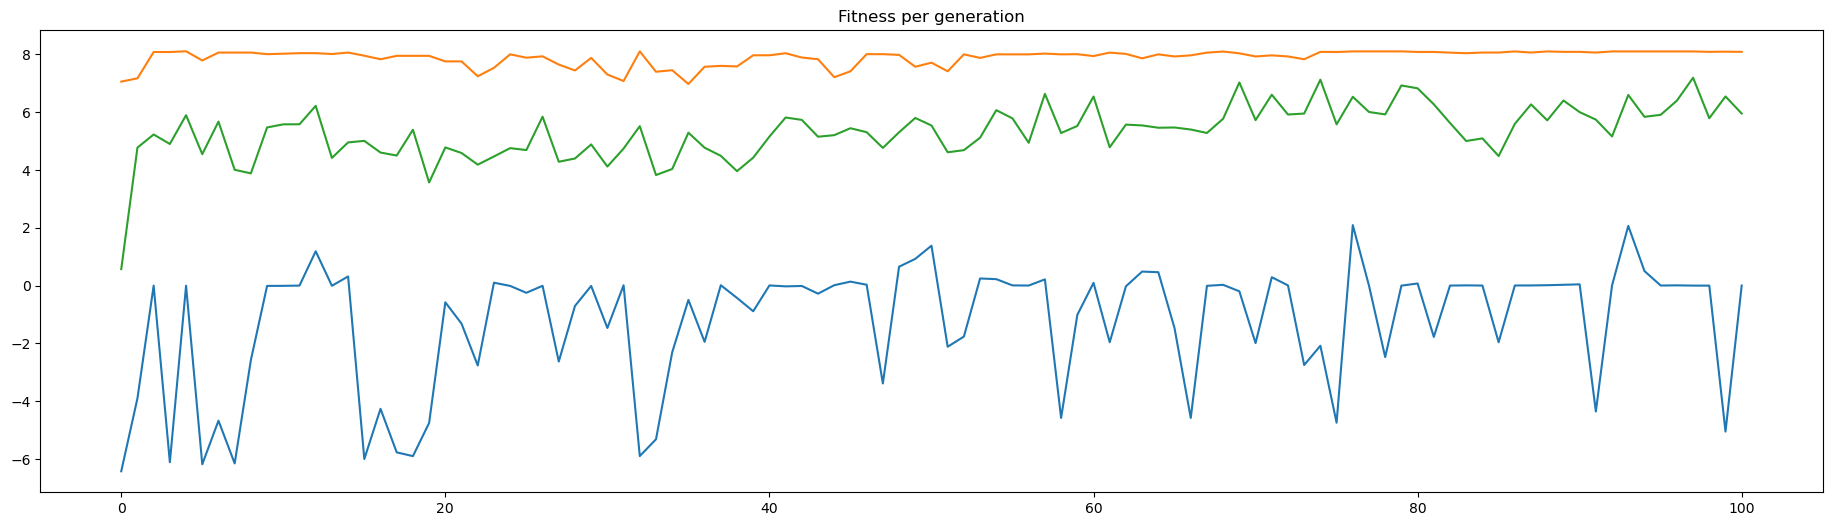

Best fitness value:  8.105393446796095
Achieved in generation:  4
Parameters values:  (-0.0117647058823529, 1.5882352941176467)


In [131]:
ga=GA(16,20,0.9,0.04,100)

mins,maxs,means,best_c=ga.perform_selection()

mins,maxs,means=np.array(mins),np.array(maxs),np.array(means)

plot_ga(mins,maxs,means)

max_index=np.argmax(maxs)
best_params=ga.decode(best_c[max_index])

print("Best fitness value: ", maxs[max_index])
print("Achieved in generation: ", max_index)
print("Parameters values: ", best_params)




Generation: 0 | Fitness: 7.069624680732099
Generation: 1 | Fitness: 7.055586937670988
Generation: 2 | Fitness: 5.268172333502972
Generation: 3 | Fitness: 6.139720683262942
Generation: 4 | Fitness: 6.598116287902244
Generation: 5 | Fitness: 6.334575987436306
Generation: 6 | Fitness: 6.297600882652596
Generation: 7 | Fitness: 6.468438776862887
Generation: 8 | Fitness: 6.138210905401121
Generation: 9 | Fitness: 6.366509577220756
Generation: 10 | Fitness: 6.021946002198694
Generation: 11 | Fitness: 6.171610984980397
Generation: 12 | Fitness: 6.171610984980397
Generation: 13 | Fitness: 6.398627419850611
Generation: 14 | Fitness: 6.614842119743245
Generation: 15 | Fitness: 6.614842119743245
Generation: 16 | Fitness: 6.614842119743245
Generation: 17 | Fitness: 6.614842119743245
Generation: 18 | Fitness: 6.224759290359439
Generation: 19 | Fitness: 6.8190736662863545
Generation: 20 | Fitness: 6.614842119743245
Generation: 21 | Fitness: 6.8190736662863545
Generation: 22 | Fitness: 6.614842119743

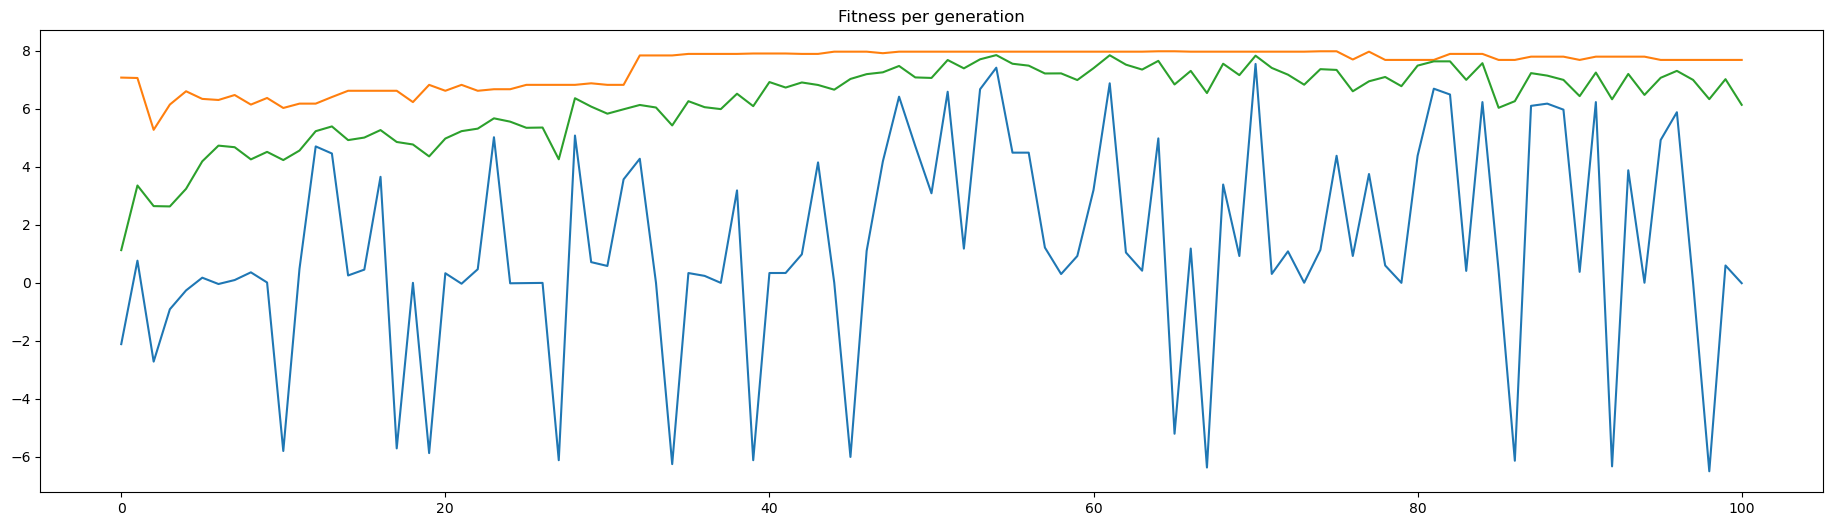

Best fitness value:  7.9768406439537625
Achieved in generation:  64
Parameters values:  (0.0117647058823529, 1.4941176470588236)


In [132]:
ga=GA(16,20,1.0,0.01,100)

mins,maxs,means,best_c=ga.perform_selection()

mins,maxs,means=np.array(mins),np.array(maxs),np.array(means)

plot_ga(mins,maxs,means)
max_index=np.argmax(maxs)

best_params=ga.decode(best_c[max_index])

print("Best fitness value: ", maxs[max_index])
print("Achieved in generation: ", max_index)
print("Parameters values: ", best_params)